# SVM IRIS multi

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

In [4]:
import myutils as my

my.hello()

Hello!


In [5]:
X_train, X_test, y_train, y_test = my.get_iris('bin')

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(80, 4) (20, 4)
(80,) (20,)


## 정규화
- 표준화(StandardScaler)
- 최대최소 정규화(MinMaxScaler)

In [6]:
scaler = MinMaxScaler()
scaler.fit(X_train)
#각 컬럼별 최대 최소 계산
X_train=scaler.transform(X_train)
#최대최소 정규화 형태로 변환, DataFrame 을 Numpy 배열 형태로 변환
X_train[:4]

array([[0.62962963, 0.58333333, 0.85365854, 0.88235294],
       [0.33333333, 0.58333333, 0.09756098, 0.05882353],
       [0.03703704, 0.375     , 0.09756098, 0.05882353],
       [0.18518519, 0.58333333, 0.14634146, 0.05882353]])

In [7]:
y_train=y_train.values
y_train

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

### 학습

In [8]:
clf = SVC(kernel='linear', random_state=2022)
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=2022)

In [9]:
clf.score(X_train, y_train)

1.0

In [10]:
clf.coef_

array([[ 0.36369934, -1.12477515,  1.82897479,  1.51865788]])

In [11]:
clf.intercept_

array([-0.98278222])

### 최종

In [12]:
X_test = scaler.transform(X_test)
y_test = y_test.values

In [13]:
clf.score(X_test, y_test)

1.0

In [14]:
y_pred = clf.predict(X_test)

In [15]:
my.print_score(y_test, y_pred, average='macro')

accuracy: 1.0
precision: 1.0
recall: 1.0


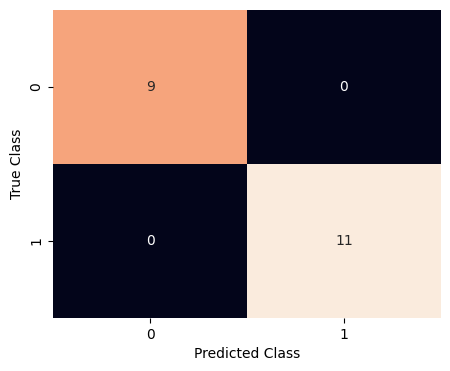

In [16]:
my.plot_confusion_matrix(y_test,y_pred)

# 다중분류(이거 MinMax로 하니까 안되요...

In [17]:
X_train, X_test, y_train, y_test = my.get_iris()

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(120, 4) (30, 4)
(120,) (30,)


In [18]:
X_train[0:4]

,sepal_length,sepal_width,petal_length,petal_width
9,4.9,3.1,1.5,0.1
59,5.2,2.7,3.9,1.4
16,5.4,3.9,1.3,0.4
122,7.7,2.8,6.7,2.0


In [19]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [20]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
X_train_s=scaler.transform(X_train)
y_train_s=y_train.values
X_test_s=scaler.transform(X_test)
y_test_s=y_test.values

In [22]:
clf.score(X_train_s, y_train_s)

C:\Users\023\anaconda3\envs\flyai\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.31666666666666665

In [23]:
clf.coef_

array([[-0.04630492,  0.52107128, -1.00301993, -0.46411958],
       [-0.00705051,  0.17887454, -0.53845157, -0.29220526],
       [ 0.50018059,  0.62930057, -1.92317882, -2.01177648]])

In [24]:
clf.intercept_

array([1.45331704, 1.50715097, 7.88441182])

In [25]:
clf.score(X_test_s, y_test_s)

C:\Users\023\anaconda3\envs\flyai\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.4

In [26]:
y_pred = clf.predict(X_test_s)

C:\Users\023\anaconda3\envs\flyai\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [27]:
my.print_score(y_test_s, y_pred, average='macro')

accuracy: 0.4
precision: 0.13333333333333333
recall: 0.3333333333333333


C:\Users\023\anaconda3\envs\flyai\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


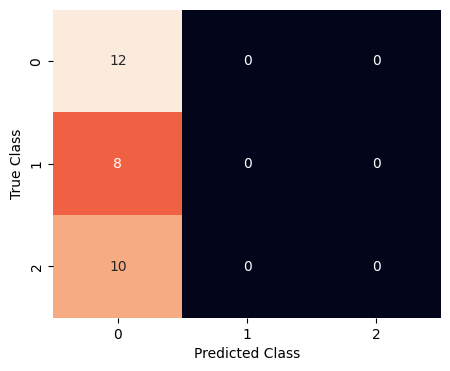

In [28]:
my.plot_confusion_matrix(y_test_s,y_pred)

# 베스트 모델 찾기

In [29]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_s=scaler.transform(X_train)
y_train_s=y_train.values

In [30]:
type(X_train_s), type(y_train_s)

(numpy.ndarray, numpy.ndarray)

### 모델 준비

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
names =['linear', 'linearSVC', 'poly', 'rbf','knn_5','knn_9']
models = [
    SVC(kernel ='linear', C=1),
    LinearSVC(C=1,max_iter=1000),
    SVC(kernel='poly', degree=3),
    SVC(kernel='rbf', C=1, gamma=0.7),
    KNeighborsClassifier(n_neighbors=5),
    KNeighborsClassifier(n_neighbors=9)
]

scores = {}
for name, model in zip(names, models):
    model.fit(X_train_s, y_train_s)
    score = model.score(X_train_s, y_train_s)
    print(name,score)
    scores[name] = score

linear 0.9666666666666667
linearSVC 0.9416666666666667
poly 0.9916666666666667
rbf 0.9666666666666667
knn_5 0.9666666666666667
knn_9 0.975


In [32]:
scores

{'linear': 0.9666666666666667,
 'linearSVC': 0.9416666666666667,
 'poly': 0.9916666666666667,
 'rbf': 0.9666666666666667,
 'knn_5': 0.9666666666666667,
 'knn_9': 0.975}

<AxesSubplot: ylabel='Count'>

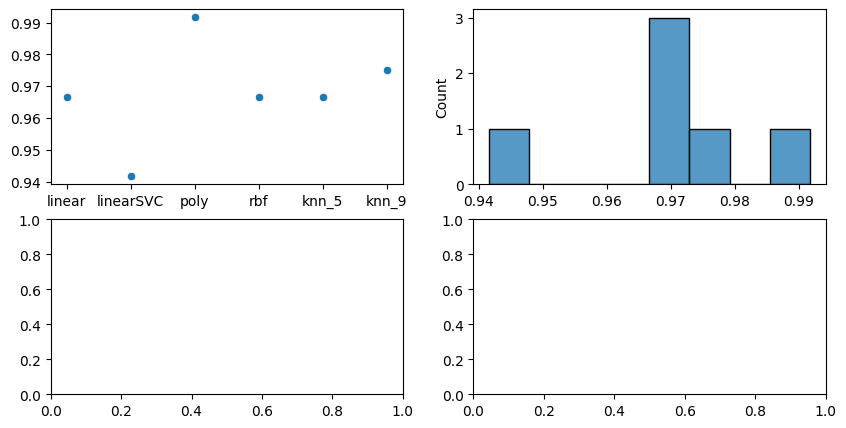

In [33]:
fig, axes = plt.subplots(2,2, figsize=(10,5))
sns.scatterplot(data=scores, ax=axes[0,0])
sns.histplot(data=scores, ax=axes[0,1])

### GridSearch

In [34]:
type(X_train_s),type(y_train_s)

(numpy.ndarray, numpy.ndarray)

In [35]:
param_range = [0.001,0.01, 0.1,1,10,100,1000]
params = [
    {
        'C' : param_range,
        'gamma' : param_range,
        'kernel' : ['rbf']
    },
    {
        'C' : param_range,
        'kernel' : ['linear']
    }
    ,
    {
        'C' : param_range,
        'degree' : [2,3],#2차원 3차원
        'kernel' : ['poly'] 
    }
]
params


[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
  'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
  'kernel': ['rbf']},
 {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
 {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
  'degree': [2, 3],
  'kernel': ['poly']}]

In [36]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [37]:
clf = SVC(random_state = 2023) #서포트벡터머신
gs = GridSearchCV(estimator = clf, #여러개 생성
                 scoring = 'accuracy',
                 param_grid = params, #파라미터를 기준으로 하나씩 집어넣음
                 cv = 3, #테스트 셋을 여러개로 나눔
                 n_jobs = -1, #학습 쓰레드
                  verbose=3 #알려주는거
                 )
gs.fit(X_train_s,y_train_s)

Fitting 3 folds for each of 70 candidates, totalling 210 fits
[CV 1/3] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.350 total time=   0.0s
[CV 2/3] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.350 total time=   0.0s
[CV 3/3] END ..C=0.001, gamma=0.001, kernel=rbf;, score=0.350 total time=   0.0s
[CV 1/3] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.350 total time=   0.0s
[CV 2/3] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.350 total time=   0.0s
[CV 3/3] END ...C=0.001, gamma=0.01, kernel=rbf;, score=0.350 total time=   0.0s
[CV 1/3] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.350 total time=   0.0s
[CV 2/3] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.350 total time=   0.0s
[CV 3/3] END ....C=0.001, gamma=0.1, kernel=rbf;, score=0.350 total time=   0.0s
[CV 1/3] END ......C=0.001, gamma=1, kernel=rbf;, score=0.350 total time=   0.0s
[CV 2/3] END ......C=0.001, gamma=1, kernel=rbf;, score=0.350 total time=   0.0s
[CV 3/3] END ......C=0.001, gamma=1, kernel=rbf

[CV 3/3] END .......C=100, gamma=10, kernel=rbf;, score=0.950 total time=   0.0s
[CV 1/3] END ......C=100, gamma=100, kernel=rbf;, score=0.950 total time=   0.0s
[CV 2/3] END ......C=100, gamma=100, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/3] END ......C=100, gamma=100, kernel=rbf;, score=0.925 total time=   0.0s
[CV 1/3] END .....C=100, gamma=1000, kernel=rbf;, score=0.475 total time=   0.0s
[CV 2/3] END .....C=100, gamma=1000, kernel=rbf;, score=0.425 total time=   0.0s
[CV 3/3] END .....C=100, gamma=1000, kernel=rbf;, score=0.475 total time=   0.0s
[CV 1/3] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.950 total time=   0.0s
[CV 2/3] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.975 total time=   0.0s
[CV 3/3] END ...C=1000, gamma=0.001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/3] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.950 total time=   0.0s
[CV 2/3] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.925 total time=   0.0s
[CV 3/3] END ....C=1000, gam

GridSearchCV(cv=3, estimator=SVC(random_state=2023), n_jobs=1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'kernel': ['linear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'degree': [2, 3], 'kernel': ['poly']}],
             scoring='accuracy', verbose=3)

In [38]:
gs.best_estimator_

SVC(C=10, gamma=0.1, random_state=2023)

In [39]:
gs.best_score_

0.975

In [40]:
gs.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

### 재학습

In [41]:
clf = SVC(C=10, gamma= 0.1, kernel= 'rbf', random_state=2023)
clf.fit(X_train_s, y_train_s)

SVC(C=10, gamma=0.1, random_state=2023)

In [42]:
clf.score(X_train_s, y_train_s)

0.975

In [43]:
clf.score(X_test_s, y_test_s)

0.9666666666666667

In [44]:
clf = SVC(random_state = 2023)
gs = RandomizedSearchCV(estimator = clf,
                 scoring = 'accuracy',
                 param_distributions = params,
                 cv = 3,
                 n_jobs = 1,
                  verbose=3
                 )
gs.fit(X_train_s,y_train_s)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END .........C=10, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 2/3] END .........C=10, gamma=1, kernel=rbf;, score=0.975 total time=   0.0s
[CV 3/3] END .........C=10, gamma=1, kernel=rbf;, score=0.975 total time=   0.0s
[CV 1/3] END ...C=0.001, gamma=1000, kernel=rbf;, score=0.350 total time=   0.0s
[CV 2/3] END ...C=0.001, gamma=1000, kernel=rbf;, score=0.350 total time=   0.0s
[CV 3/3] END ...C=0.001, gamma=1000, kernel=rbf;, score=0.350 total time=   0.0s
[CV 1/3] END .....C=1000, degree=2, kernel=poly;, score=0.925 total time=   0.0s
[CV 2/3] END .....C=1000, degree=2, kernel=poly;, score=0.950 total time=   0.0s
[CV 3/3] END .....C=1000, degree=2, kernel=poly;, score=0.975 total time=   0.0s
[CV 1/3] END ................C=1, kernel=linear;, score=0.925 total time=   0.0s
[CV 2/3] END ................C=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 3/3] END ................C=1, kernel=linear;

RandomizedSearchCV(cv=3, estimator=SVC(random_state=2023), n_jobs=1,
                   param_distributions=[{'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                               1000],
                                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000],
                                         'kernel': ['rbf']},
                                        {'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                               1000],
                                         'kernel': ['linear']},
                                        {'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                               1000],
                                         'degree': [2, 3],
                                         'kernel': ['poly']}],
                   scoring='accuracy', verbose=3)

In [45]:
gs.best_params_

{'kernel': 'rbf', 'gamma': 1, 'C': 10}

In [46]:
clf = SVC(C=1000, kernel= 'linear', random_state=2023)
clf.fit(X_train_s, y_train_s)
clf.score(X_train_s, y_train_s)

0.9916666666666667